# Loops & Orbits &mdash; Week 2 &mdash; Day 1 &mdash; Jupyter Notebook

## Knocking the Ball out of the Park

This is your first example of motion in two dimensions!

First we need all the initial conditions. We are not yet putting in air resistance. That will come in the next notebook.

**Make sure you understand all of the initialization variables below. There is nothing for you to do in the next code cell except execute it.**

In [1]:
# Initial speed of hit ball in meters per second
initial_speed = 50

# Initial angle of hit ball in degrees from horizontal
initial_angle = 35

# Simulation time step in seconds
delta_t = 0.1

# Distance to fence in meters
distance_to_fence = 100

# Initial speed of hit ball
initial_speed = 40

# Initial angle of hit ball in degrees from horizontal
initial_angle = 30

# x-acceleration -- there is no x acceleration (until we put in wind resistance, which slows the motion)
x_acceleration = 0.0

# y-accleration -- the y acceleration is due to gravity -- the amount is 9.81 m/s^2 downwards
y_acceleration = -9.81

# Simulation time step in seconds
delta_t = 0.1

# You don't know how import statements work yet.
# Trust that the following allows you to use the sin function,
# the cos function, and the constant pi in your code:
from math import sin, cos, pi

# The following statements make the plotting library available to us,
# and they work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
# which was causing plots to not appear the first time they were drawn
%matplotlib inline
import matplotlib.pyplot as plt

## Functions to Convert Speed and Angle to Horizontal Velocity and Vertical Velocity

The horizontal_velocity function is written for you.

**Write the vertical_velocity function which currently has a nonsense return value.**

In [2]:
# You could check that this function returns 0 or something very close to that when angle is 90 degrees
def horizontal_velocity(speed, angle_from_horizontal):
    # convert angle from degrees to radians
    angle = angle_from_horizontal * 2 * pi / 360
    return speed * cos(angle)
    
# You could check that this function returns speed or something very close to that when angle is 90 degrees
def vertical_velocity(speed, angle_from_horizontal):
    # convert angle from degrees to radians
    angle = angle_from_horizontal * 2 * pi / 360
    return speed * sin(angle)


initial_x_velocity = horizontal_velocity(initial_speed, initial_angle)

initial_y_velocity = vertical_velocity(initial_speed, initial_angle)


## The While Loop That Does the Work

**Make the following modifications to the code below:**

* Change the test of whether the y position is greater than 0 to instead test whether the x position has gone past the fence
* **Everywhere** there is some code for x (like ```x_velocities = [initial_x_velocity]```) add the corresponding code for y (in that case, you need to add ```y_velocities = [initial_y_velocity]```)

In [3]:
# Initialize the velocities
x_velocities = [initial_x_velocity]
y_velocities = [initial_y_velocity]

# Initialize the x positions -- start with 0.0
x_positions = [0.0]
# Initialize the y positions -- start with 1.0
y_positions = [1.0]

# Initialize the times -- simulation start when batter hits ball
times = [0.0]

# We want to go until the ball is over the fence -- fix the next line if you haven't already -- DONE
while x_positions[-1] < distance_to_fence:
    #
    # get all the before values -- they are the ones at the end of the lists
    #
    # velocities
    before_x_velocity = x_velocities[-1]
    before_y_velocity = y_velocities[-1]
    # positions
    before_x_position = x_positions[-1]
    before_y_position = y_positions[-1]
    # time
    before_time = times[-1]
    #
    # calculate the after values
    #
    # x and y velocities are updated with accelerations
    after_x_velocity = before_x_velocity + delta_t * x_acceleration
    after_y_velocity = before_y_velocity + delta_t * y_acceleration
    # x and y positions are updated with velocities
    after_x_position = before_x_position + delta_t * before_x_velocity
    after_y_position = before_y_position + delta_t * before_y_velocity
    # update time
    after_time = before_time + delta_t
    #
    # append all the after values to their lists
    #
    x_velocities.append(after_x_velocity)
    y_velocities.append(after_y_velocity)
    x_positions.append(after_x_position)
    y_positions.append(after_y_position)
    times.append(after_time)


## Make an X-Position vs. Time Graph

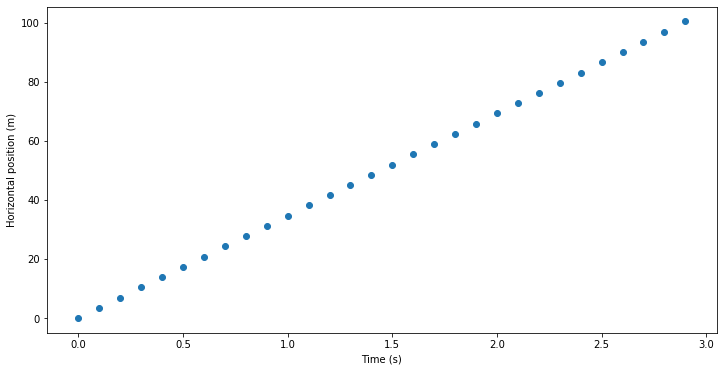

In [4]:
plt.figure(figsize=(12, 6))

plt.scatter(times, x_positions)

plt.xlabel("Time (s)")
plt.ylabel("Horizontal position (m)")

plt.show()

Do you understand why the x-vs-t graph is so simple? In our next notebook we will add air resistance so x-vs-t will show the horizontal speed slowing.

## Make a Y-Position vs. Time Graph

**Study the example code that made the x-vs-t graph. You only have to change a few things to graph y vs. t.**

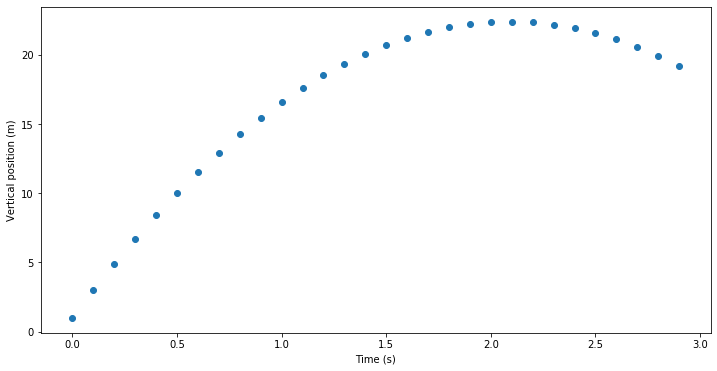

In [5]:
plt.figure(figsize=(12, 6))

plt.scatter(times, y_positions)

plt.xlabel("Time (s)")
plt.ylabel("Vertical position (m)")

plt.show()

## Make a Y-Position vs. X-Position Graph

**Above you have graphs for both x-vs-t and y-vs-t. For the third and final graph, do y-vs-x.**

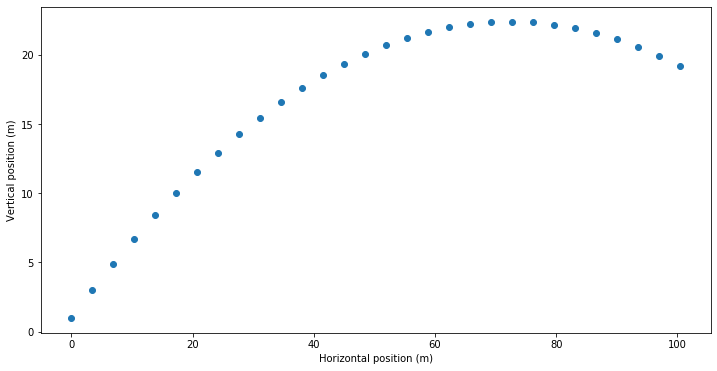

In [6]:
plt.figure(figsize=(12, 6))

plt.scatter(x_positions, y_positions)

plt.xlabel("Horizontal position (m)")
plt.ylabel("Vertical position (m)")

plt.show()

## Conclusion

We are letting the computer do so much work, it is easy to not fully appreciate what has been plotted.

Make sure your second and third graphs are correct:

* The maximum height in the second graph is about 22 meters. The maximum time is about 3 seconds.
* The maximum height in the third graph is still 22 meters. The maximum horizontal position should be when the ball cleaers the outfield fence &mdash; just over 100 meters.

and then study the differences between all three graphs.

Why do the second and third graphs look superficially similar? Check the horizontal axis. If everything has gone properly, the second graph finishes at about 3 seconds. The third graph finishes when the ball clears the outfield fence, which is 100 meters.